In [1]:
import pandas as pd
import numpy as np
import contractions
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\cep4u\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cep4u\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\cep4u\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cep4u\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\cep4u\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)

In [3]:
#Identify null values
for col in df.columns:
    print(col, df[col].isnull().sum())

link 0
headline 0
category 0
short_description 0
authors 0
date 0


In [4]:
hdl_cat = df.loc[:, ['headline', 'short_description', 'category']]

In [5]:
#removed contractions
hdl_cat['RemoveContractions_hdl'] = hdl_cat['headline'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [6]:
hdl_cat['RemoveContractions_desc'] = hdl_cat['short_description'].apply(lambda x: [contractions.fix(word) for word in x.split()])
hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank..."


In [7]:
#put back into sentences
hdl_cat['hdl_str'] = [' '.join(map(str, l)) for l in hdl_cat['RemoveContractions_hdl']]
hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...


In [8]:
#put back into sentences without contractions
hdl_cat['desc_str'] = [' '.join(map(str, l)) for l in hdl_cat['RemoveContractions_desc']]
hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...


In [9]:
#tokenized strings, similar to the result we see from "remove contractions" 
#but now contracted words that were seperated will be seperate items in 
#the string completely

hdl_cat['tokenized_hdl'] = hdl_cat['hdl_str'].apply(word_tokenize)
hdl_cat['tokenized_desc'] = hdl_cat['desc_str'].apply(word_tokenize)

hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[American, Airlines, Flyer, Charged, ,, Banned...","[He, was, subdued, by, passengers, and, crew, ..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, Of, The, Funniest, Tweets, About, Cats, A...","[``, Until, you, have, a, dog, you, do, not, u..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[The, Funniest, Tweets, From, Parents, This, W...","[``, Accidentally, put, grown-up, toothpaste, ..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank..."


In [10]:
hdl_cat['tokenized_hdl'][0]

['Over',
 '4',
 'Million',
 'Americans',
 'Roll',
 'Up',
 'Sleeves',
 'For',
 'Omicron-Targeted',
 'COVID',
 'Boosters']

In [11]:
#Convert to lowercase

hdl_cat['tokenized_hdl'] = hdl_cat['tokenized_hdl'].apply(lambda x: [word.lower() for word in x])
hdl_cat['tokenized_desc'] = hdl_cat['tokenized_desc'].apply(lambda x: [word.lower() for word in x])

hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, ,, banned...","[he, was, subdued, by, passengers, and, crew, ..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[woman, who, called, cops, on, black, bird-wat...","[amy, cooper, accused, investment, firm, frank..."


In [12]:
#remove punction

hdl_cat['tokenized_hdl'] = hdl_cat['tokenized_hdl'].apply(lambda x: [word for word in x if word not in string.punctuation])
hdl_cat['tokenized_desc'] = hdl_cat['tokenized_desc'].apply(lambda x: [word for word in x if word not in string.punctuation])

hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[woman, who, called, cops, on, black, bird-wat...","[amy, cooper, accused, investment, firm, frank..."


In [13]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))
hdl_cat['stopwords_removed_hdl'] = hdl_cat['tokenized_hdl'].apply(lambda x: [word for word in x if word not in stop_words])
hdl_cat['stopwords_removed_desc'] = hdl_cat['tokenized_desc'].apply(lambda x: [word for word in x if word not in stop_words])

hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,stopwords_removed_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to...","[4, million, americans, roll, sleeves, omicron...","[health, experts, said, early, predict, whethe..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...","[subdued, passengers, crew, fled, back, aircra..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....","[``, dog, understand, could, eaten, '']"
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ...","[funniest, tweets, parents, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[woman, who, called, cops, on, black, bird-wat...","[amy, cooper, accused, investment, firm, frank...","[woman, called, cops, black, bird-watcher, los...","[amy, cooper, accused, investment, firm, frank..."


In [14]:
hdl_cat['headline'][226]

"Don't Look Up! A Possible Meteor Causes Loud 'Boom' Sound In Utah"

In [15]:
hdl_cat['stopwords_removed_hdl'][226]

['look', 'possible', 'meteor', 'causes', 'loud', "'boom", 'sound', 'utah']

In [16]:
# Apply POS tags
hdl_cat['pos_tags_hdl'] = hdl_cat['stopwords_removed_hdl'].apply(nltk.tag.pos_tag)
hdl_cat['pos_tags_desc'] = hdl_cat['stopwords_removed_desc'].apply(nltk.tag.pos_tag)
hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,stopwords_removed_desc,pos_tags_hdl,pos_tags_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to...","[4, million, americans, roll, sleeves, omicron...","[health, experts, said, early, predict, whethe...","[(4, CD), (million, CD), (americans, NNS), (ro...","[(health, NN), (experts, NNS), (said, VBD), (e..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...","[subdued, passengers, crew, fled, back, aircra...","[(american, JJ), (airlines, NNS), (flyer, RB),...","[(subdued, VBN), (passengers, NNS), (crew, VBD..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....","[``, dog, understand, could, eaten, '']","[(23, CD), (funniest, JJS), (tweets, NNS), (ca...","[(``, ``), (dog, NN), (understand, NN), (could..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ...","[funniest, tweets, parents, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ...","[(funniest, JJS), (tweets, NNS), (parents, NNS...","[(``, ``), (accidentally, RB), (put, VB), (gro..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[woman, who, called, cops, on, black, bird-wat...","[amy, cooper, accused, investment, firm, frank...","[woman, called, cops, black, bird-watcher, los...","[amy, cooper, accused, investment, firm, frank...","[(woman, NN), (called, VBN), (cops, NNS), (bla...","[(amy, JJ), (cooper, NN), (accused, VBN), (inv..."


In [17]:
hdl_cat['pos_tags_hdl'][226]

[('look', 'NN'),
 ('possible', 'JJ'),
 ('meteor', 'NN'),
 ('causes', 'VBZ'),
 ('loud', 'JJ'),
 ("'boom", 'POS'),
 ('sound', 'NN'),
 ('utah', 'NN')]

In [18]:
#Convert POS tagging to wordnet format foor NLTKs lemmatizer

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
hdl_cat['wordnet_pos_hdl'] = hdl_cat['pos_tags_hdl'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
hdl_cat['wordnet_pos_desc'] = hdl_cat['pos_tags_desc'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,stopwords_removed_desc,pos_tags_hdl,pos_tags_desc,wordnet_pos_hdl,wordnet_pos_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to...","[4, million, americans, roll, sleeves, omicron...","[health, experts, said, early, predict, whethe...","[(4, CD), (million, CD), (americans, NNS), (ro...","[(health, NN), (experts, NNS), (said, VBD), (e...","[(4, n), (million, n), (americans, n), (roll, ...","[(health, n), (experts, n), (said, v), (early,..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...","[subdued, passengers, crew, fled, back, aircra...","[(american, JJ), (airlines, NNS), (flyer, RB),...","[(subdued, VBN), (passengers, NNS), (crew, VBD...","[(american, a), (airlines, n), (flyer, r), (ch...","[(subdued, v), (passengers, n), (crew, v), (fl..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....","[``, dog, understand, could, eaten, '']","[(23, CD), (funniest, JJS), (tweets, NNS), (ca...","[(``, ``), (dog, NN), (understand, NN), (could...","[(23, n), (funniest, a), (tweets, n), (cats, n...","[(``, n), (dog, n), (understand, n), (could, n..."
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ...","[funniest, tweets, parents, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ...","[(funniest, JJS), (tweets, NNS), (parents, NNS...","[(``, ``), (accidentally, RB), (put, VB), (gro...","[(funniest, a), (tweets, n), (parents, n), (we...","[(``, n), (accidentally, r), (put, v), (grown-..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[woman, who, called, cops, on, black, bird-wat...","[amy, cooper, accused, investment, firm, frank...","[woman, called, cops, black, bird-watcher, los...","[amy, cooper, accused, investment, firm, frank...","[(woman, NN), (called, VBN), (cops, NNS), (bla...","[(amy, JJ), (cooper, NN), (accused, VBN), (inv...","[(woman, n), (called, v), (cops, n), (black, a...","[(amy, a), (cooper, n), (accused, v), (investm..."


In [19]:
hdl_cat['wordnet_pos_hdl'][226]

[('look', 'n'),
 ('possible', 'a'),
 ('meteor', 'n'),
 ('causes', 'v'),
 ('loud', 'a'),
 ("'boom", 'n'),
 ('sound', 'n'),
 ('utah', 'n')]

In [20]:
wnl = WordNetLemmatizer()
hdl_cat['lemmatized_hdl'] = hdl_cat['wordnet_pos_hdl'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
hdl_cat['lemmatized_desc'] = hdl_cat['wordnet_pos_desc'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

hdl_cat.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,stopwords_removed_desc,pos_tags_hdl,pos_tags_desc,wordnet_pos_hdl,wordnet_pos_desc,lemmatized_hdl,lemmatized_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to...","[4, million, americans, roll, sleeves, omicron...","[health, experts, said, early, predict, whethe...","[(4, CD), (million, CD), (americans, NNS), (ro...","[(health, NN), (experts, NNS), (said, VBD), (e...","[(4, n), (million, n), (americans, n), (roll, ...","[(health, n), (experts, n), (said, v), (early,...","[4, million, american, roll, sleeve, omicron-t...","[health, expert, say, early, predict, whether,..."
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...","[subdued, passengers, crew, fled, back, aircra...","[(american, JJ), (airlines, NNS), (flyer, RB),...","[(subdued, VBN), (passengers, NNS), (crew, VBD...","[(american, a), (airlines, n), (flyer, r), (ch...","[(subdued, v), (passengers, n), (crew, v), (fl...","[american, airline, flyer, charge, ban, life, ...","[subdue, passenger, crew, flee, back, aircraft..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....","[``, dog, understand, could, eaten, '']","[(23, CD), (funniest, JJS), (tweets, NNS), (ca...","[(``, ``), (dog, NN), (understand, NN), (could...","[(23, n), (funniest, a), (tweets, n), (cats, n...","[(``, n), (dog, n), (understand, n), (could, n...","[23, funny, tweet, cat, dog, week, sept., 17-23]","[``, dog, understand, could, eat, '']"
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ...","[funniest, tweets, parents, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ...","[(funniest, JJS), (tweets, NNS), (parents, NNS...","[(``, ``), (accidentally, RB), (put, VB), (gro...","[(funniest, a), (tweets, n), (parents, n), (we...","[(``, n), (accidentally, r), (put, v), (grown-...","[funny, tweet, parent, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, Who, Called, Cops, On, Black, Bird-Wat...","[Amy, Cooper, accused, investment, firm, Frank...",Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,"[woman, who, called, cops, on, black, bird-wat...","[amy, cooper, accused, investment, fir

In [21]:
hdl_cat['short_description'][228]

'University of California, Davis is investigating what led to the deaths of tens of thousands of fish, including chinook salmon.'

In [22]:
hdl_cat['lemmatized_desc'][228] 

['university',
 'california',
 'davis',
 'investigate',
 'lead',
 'death',
 'ten',
 'thousand',
 'fish',
 'include',
 'chinook',
 'salmon']

In [23]:
hdl_cat.to_csv('News Category Dataset Cleaned.csv')

In [24]:
df = hdl_cat
df['lemma_str_hdl'] = [' '.join(map(str,l)) for l in df['lemmatized_hdl']]
df['lemma_str_desc'] = [' '.join(map(str,l)) for l in df['lemmatized_desc']]

df.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,stopwords_removed_desc,pos_tags_hdl,pos_tags_desc,wordnet_pos_hdl,wordnet_pos_desc,lemmatized_hdl,lemmatized_desc,lemma_str_hdl,lemma_str_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to...","[4, million, americans, roll, sleeves, omicron...","[health, experts, said, early, predict, whethe...","[(4, CD), (million, CD), (americans, NNS), (ro...","[(health, NN), (experts, NNS), (said, VBD), (e...","[(4, n), (million, n), (americans, n), (roll, ...","[(health, n), (experts, n), (said, v), (early,...","[4, million, american, roll, sleeve, omicron-t...","[health, expert, say, early, predict, whether,...",4 million american roll sleeve omicron-targete...,health expert say early predict whether demand...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...","[subdued, passengers, crew, fled, back, aircra...","[(american, JJ), (airlines, NNS), (flyer, RB),...","[(subdued, VBN), (passengers, NNS), (crew, VBD...","[(american, a), (airlines, n), (flyer, r), (ch...","[(subdued, v), (passengers, n), (crew, v), (fl...","[american, airline, flyer, charge, ban, life, ...","[subdue, passenger, crew, flee, back, aircraft...",american airline flyer charge ban life punch f...,subdue passenger crew flee back aircraft confr...
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....","[``, dog, understand, could, eaten, '']","[(23, CD), (funniest, JJS), (tweets, NNS), (ca...","[(``, ``), (dog, NN), (understand, NN), (could...","[(23, n), (funniest, a), (tweets, n), (cats, n...","[(``, n), (dog, n), (understand, n), (could, n...","[23, funny, tweet, cat, dog, week, sept., 17-23]","[``, dog, understand, could, eat, '']",23 funny tweet cat dog week sept. 17-23,`` dog understand could eat ''
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ...","[funniest, tweets, parents, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ...","[(funniest, JJS), (tweets, NNS), (parents, NNS...","[(``, ``), (accidentally, RB), (put, VB), (gro...","[(funniest, a), (tweets, n), (parents, n), (we...","[(``, n), (accidentally, r), (put, v), (grown-...","[funny, tweet, parent, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ...",funny tweet parent week sept. 17-23,`` accidentally put grown-up toothpaste toddle...
4,Woman Who Called Co

In [25]:
df['sentiment_hdl'] = df['lemma_str_hdl'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_desc'] = df['lemma_str_desc'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,...,pos_tags_hdl,pos_tags_desc,wordnet_pos_hdl,wordnet_pos_desc,lemmatized_hdl,lemmatized_desc,lemma_str_hdl,lemma_str_desc,sentiment_hdl,sentiment_desc
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Health, experts, said, it, is, too, early, to...",Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,"[over, 4, million, americans, roll, up, sleeve...","[health, experts, said, it, is, too, early, to...","[4, million, americans, roll, sleeves, omicron...",...,"[(4, CD), (million, CD), (americans, NNS), (ro...","[(health, NN), (experts, NNS), (said, VBD), (e...","[(4, n), (million, n), (americans, n), (roll, ...","[(health, n), (experts, n), (said, v), (early,...","[4, million, american, roll, sleeve, omicron-t...","[health, expert, say, early, predict, whether,...",4 million american roll sleeve omicron-targete...,health expert say early predict whether demand...,0.000000,0.118182
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...",...,"[(american, JJ), (airlines, NNS), (flyer, RB),...","[(subdued, VBN), (passengers, NNS), (crew, VBD...","[(american, a), (airlines, n), (flyer, r), (ch...","[(subdued, v), (passengers, n), (crew, v), (fl...","[american, airline, flyer, charge, ban, life, ...","[subdue, passenger, crew, flee, back, aircraft...",american airline flyer charge ban life punch f...,subdue passenger crew flee back aircraft confr...,0.100000,0.000000
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....",...,"[(23, CD), (funniest, JJS), (tweets, NNS), (ca...","[(``, ``), (dog, NN), (understand, NN), (could...","[(23, n), (funniest, a), (tweets, n), (cats, n...","[(``, n), (dog, n), (understand, n), (could, n...","[23, funny, tweet, cat, dog, week, sept., 17-23]","[``, dog, understand, could, eat, '']",23 funny tweet cat dog week sept. 17-23,`` dog understand could eat '',0.250000,0.000000
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,"[The, Funniest, Tweets, From, Parents, This, W...","[""Accidentally, put, grown-up, toothpaste, on,...",The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...","[the, funniest, tweets, from, parents, this, w...","[``, accidentally, put, grown-up, toothpaste, ...","[funniest, tweets, parents, week, sept., 17-23]",...,"[(funniest, JJS), (tweets, NNS), (parents, NNS...","[(``, ``), (accidentally, RB), (put, VB), (gro...","[(funniest, a), (tweets, n), (parents, n), (we...","[(``, n), (accidentally, r), (put, v), (grown-...","[funny, tweet, parent, week, sept., 17-23]","[``, accidentally, put, grown-up, toothpaste, ...",funny tweet parent week sept. 17-23,`` accidentally put grown-up toothpaste toddle...,0.250000,0.366667
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS,"[Woman, 

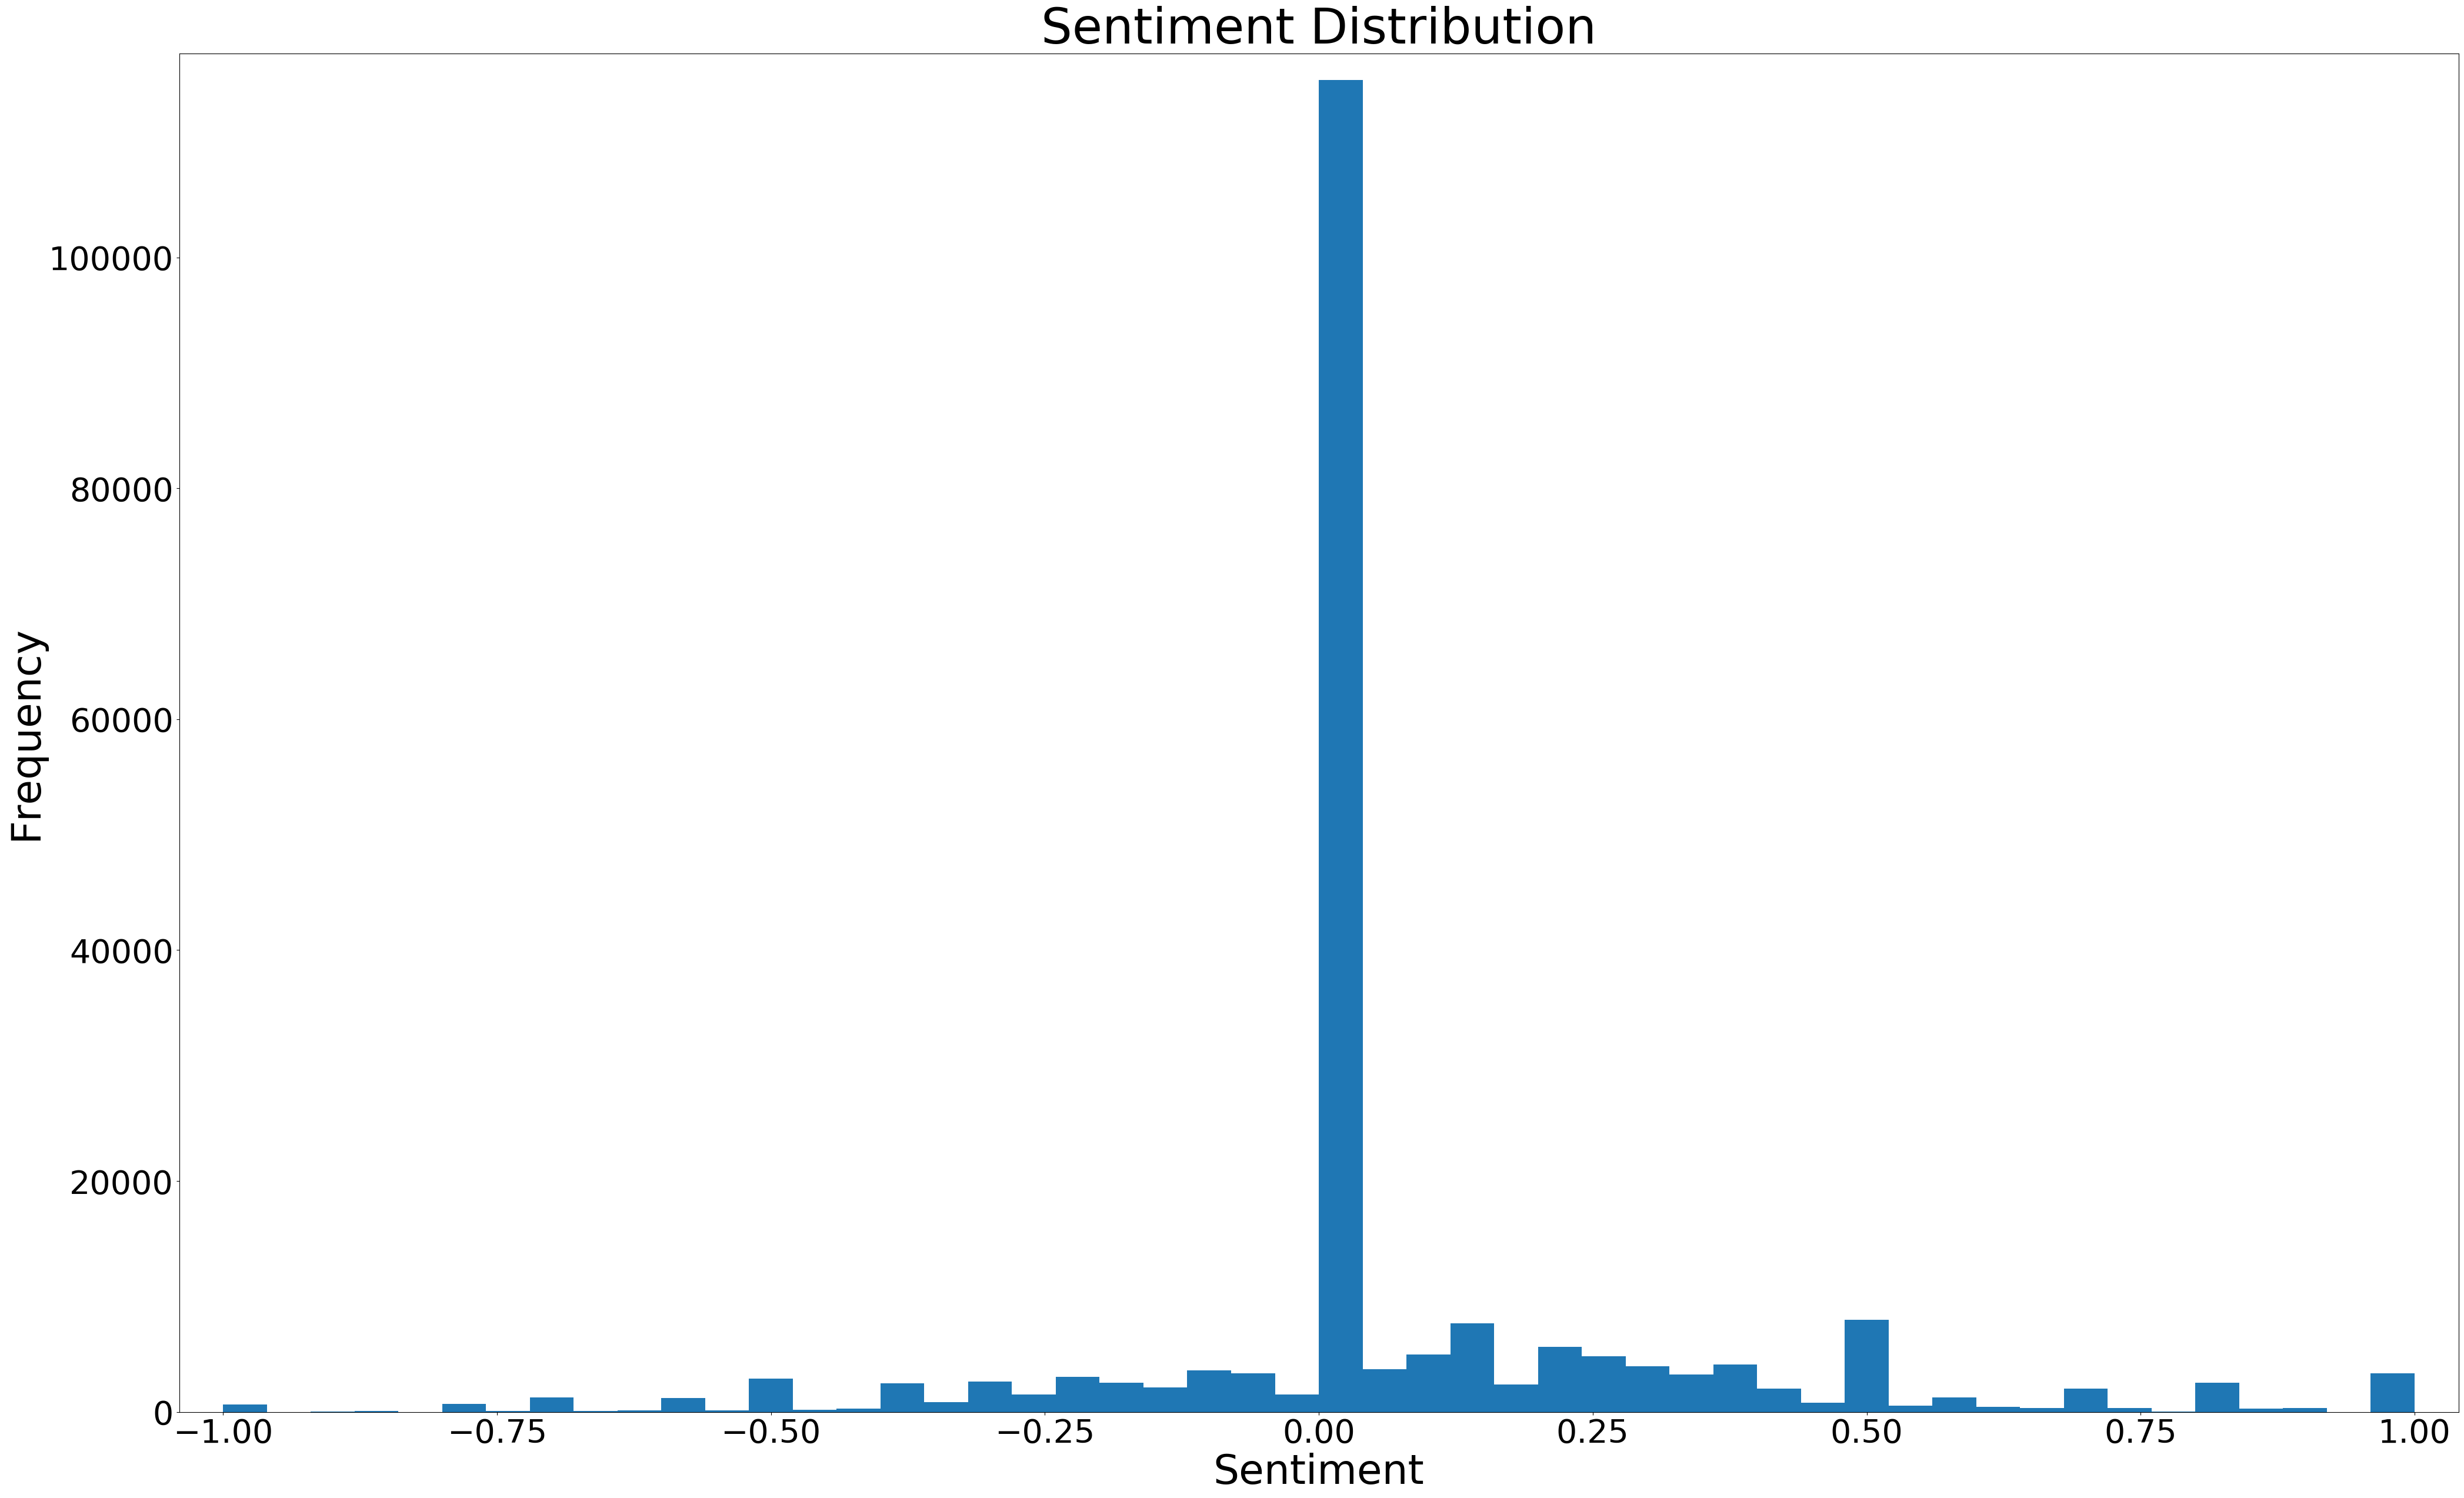

In [26]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment_hdl'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from colorspacious import cspace_converter

C:\Users\cep4u\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


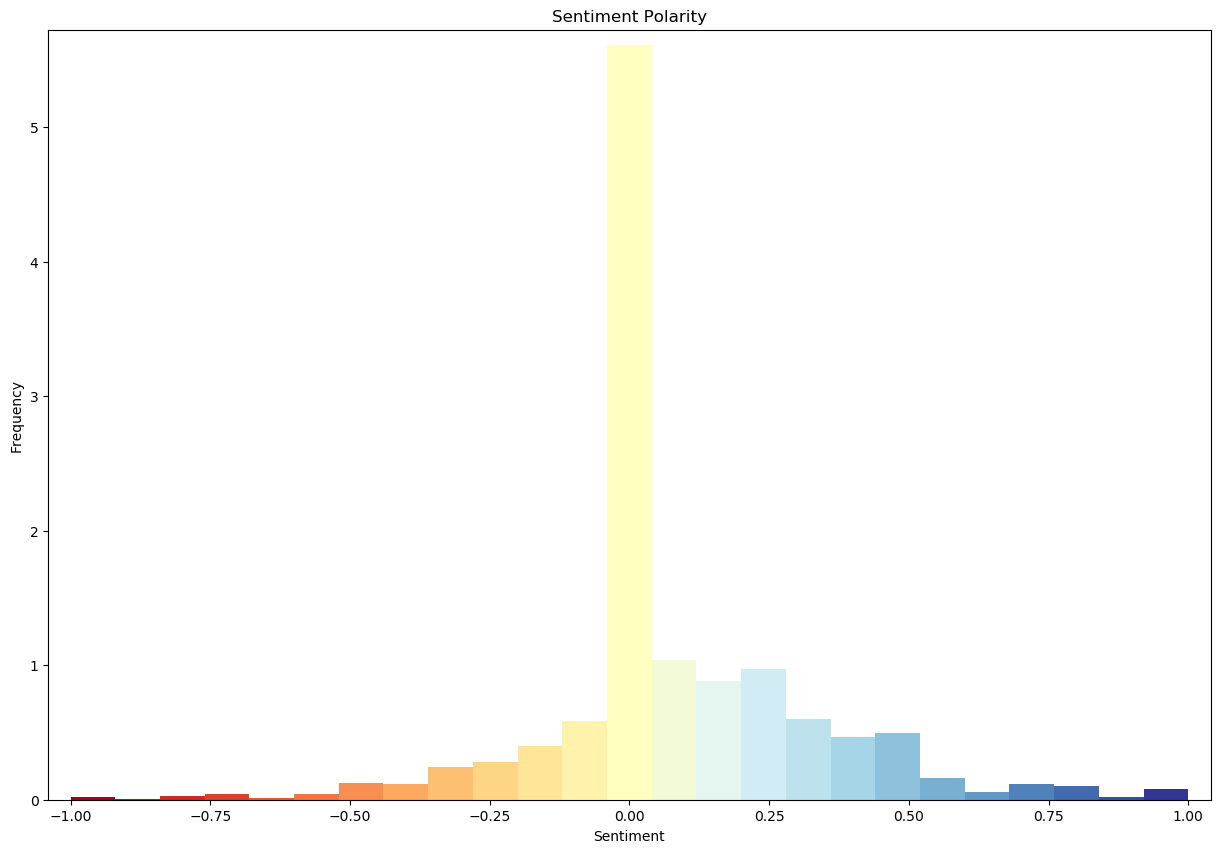

In [28]:
plt.figure(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
data = df['sentiment_desc']
n, bins, patches = plt.hist(data, 25, normed=1, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Sentiment Polarity')
plt.margins(0.02)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [29]:
df['headline'][209516]

"Allard Van Hoorn's 'Urban Songline' Explores Relationship Between Sound, Space and Materials (PHOTOS, VIDEO)"

In [30]:
df['short_description'][209516]

'A recent exhibition at Storefront for Art and Architecture is shifting the connection between song and space from the nomadic'

In [31]:
df[df['sentiment_desc'] ==0]

,headline,short_description,category,RemoveContractions_hdl,RemoveContractions_desc,hdl_str,desc_str,tokenized_hdl,tokenized_desc,stopwords_removed_hdl,...,pos_tags_hdl,pos_tags_desc,wordnet_pos_hdl,wordnet_pos_desc,lemmatized_hdl,lemmatized_desc,lemma_str_hdl,lemma_str_desc,sentiment_hdl,sentiment_desc
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS,"[American, Airlines, Flyer, Charged,, Banned, ...","[He, was, subdued, by, passengers, and, crew, ...","American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"[american, airlines, flyer, charged, banned, f...","[he, was, subdued, by, passengers, and, crew, ...","[american, airlines, flyer, charged, banned, l...",...,"[(american, JJ), (airlines, NNS), (flyer, RB),...","[(subdued, VBN), (passengers, NNS), (crew, VBD...","[(american, a), (airlines, n), (flyer, r), (ch...","[(subdued, v), (passengers, n), (crew, v), (fl...","[american, airline, flyer, charge, ban, life, ...","[subdue, passenger, crew, flee, back, aircraft...",american airline flyer charge ban life punch f...,subdue passenger crew flee back aircraft confr...,0.100000,0.0
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[""Until, you, have, a, dog, you, do not, under...",23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you do not understand wh...","[23, of, the, funniest, tweets, about, cats, a...","[``, until, you, have, a, dog, you, do, not, u...","[23, funniest, tweets, cats, dogs, week, sept....",...,"[(23, CD), (funniest, JJS), (tweets, NNS), (ca...","[(``, ``), (dog, NN), (understand, NN), (could...","[(23, n), (funniest, a), (tweets, n), (cats, n...","[(``, n), (dog, n), (understand, n), (could, n...","[23, funny, tweet, cat, dog, week, sept., 17-23]","[``, dog, understand, could, eat, '']",23 funny tweet cat dog week sept. 17-23,`` dog understand could eat '',0.250000,0.0
8,How A New Documentary Captures The Complexity ...,"In ""Mija,"" director Isabel Castro combined mus...",CULTURE & ARTS,"[How, A, New, Documentary, Captures, The, Comp...","[In, ""Mija,"", director, Isabel, Castro, combin...",How A New Documentary Captures The Complexity ...,"In ""Mija,"" director Isabel Castro combined mus...","[how, a, new, documentary, captures, the, comp...","[in, ``, mija, '', director, isabel, castro, c...","[new, documentary, captures, complexity, child...",...,"[(new, JJ), (documentary, JJ), (captures, NNS)...","[(``, ``), (mija, NN), ('', ''), (director, NN...","[(new, a), (documentary, a), (captures, n), (c...","[(``, n), (mija, n), ('', n), (director, n), (...","[new, documentary, capture, complexity, child,...","[``, mija, '', director, isabel, castro, combi...",new documentary capture complexity child immig...,`` mija '' director isabel castro combine musi...,0.068182,0.0
11,Man Sets Himself On Fire In Apparent Protest O...,The incident underscores a growing wave of pro...,WORLD NEWS,"[Man, Sets, Himself, On, Fire, In, Apparent, P...","[The, incident, underscores, a, growing, wave,...",Man Sets Himself On Fire In Apparent Protest O...,The incident underscores a growing wave of pro...,"[man, sets, himself, on, fire, in, apparent, p...","[the, incident, underscores, a, growing, wave,...","[man, sets, fire, apparent, protest, funeral, ...",...,"[(man, NN), (sets, VBZ), (fire, JJ), (apparent...","[(incident, NN), (underscores, NNS), (growing,...","[(man, n), (sets, v), (fire, a), (apparent, a)...","[(incident, n), (underscores, n), (growing, v)...","[man, set, fire, apparent, protest, funeral, j...","[incident, underscore, grow, wave, protest, fu...",man set fire apparent protest funeral japan 's...,incident underscore grow wave protest funeral ...,0.050000,0.0
14,Virginia Thomas Agrees To Interview With Jan. ...,"Conservative activist Virginia Thomas, the wif...",U.S

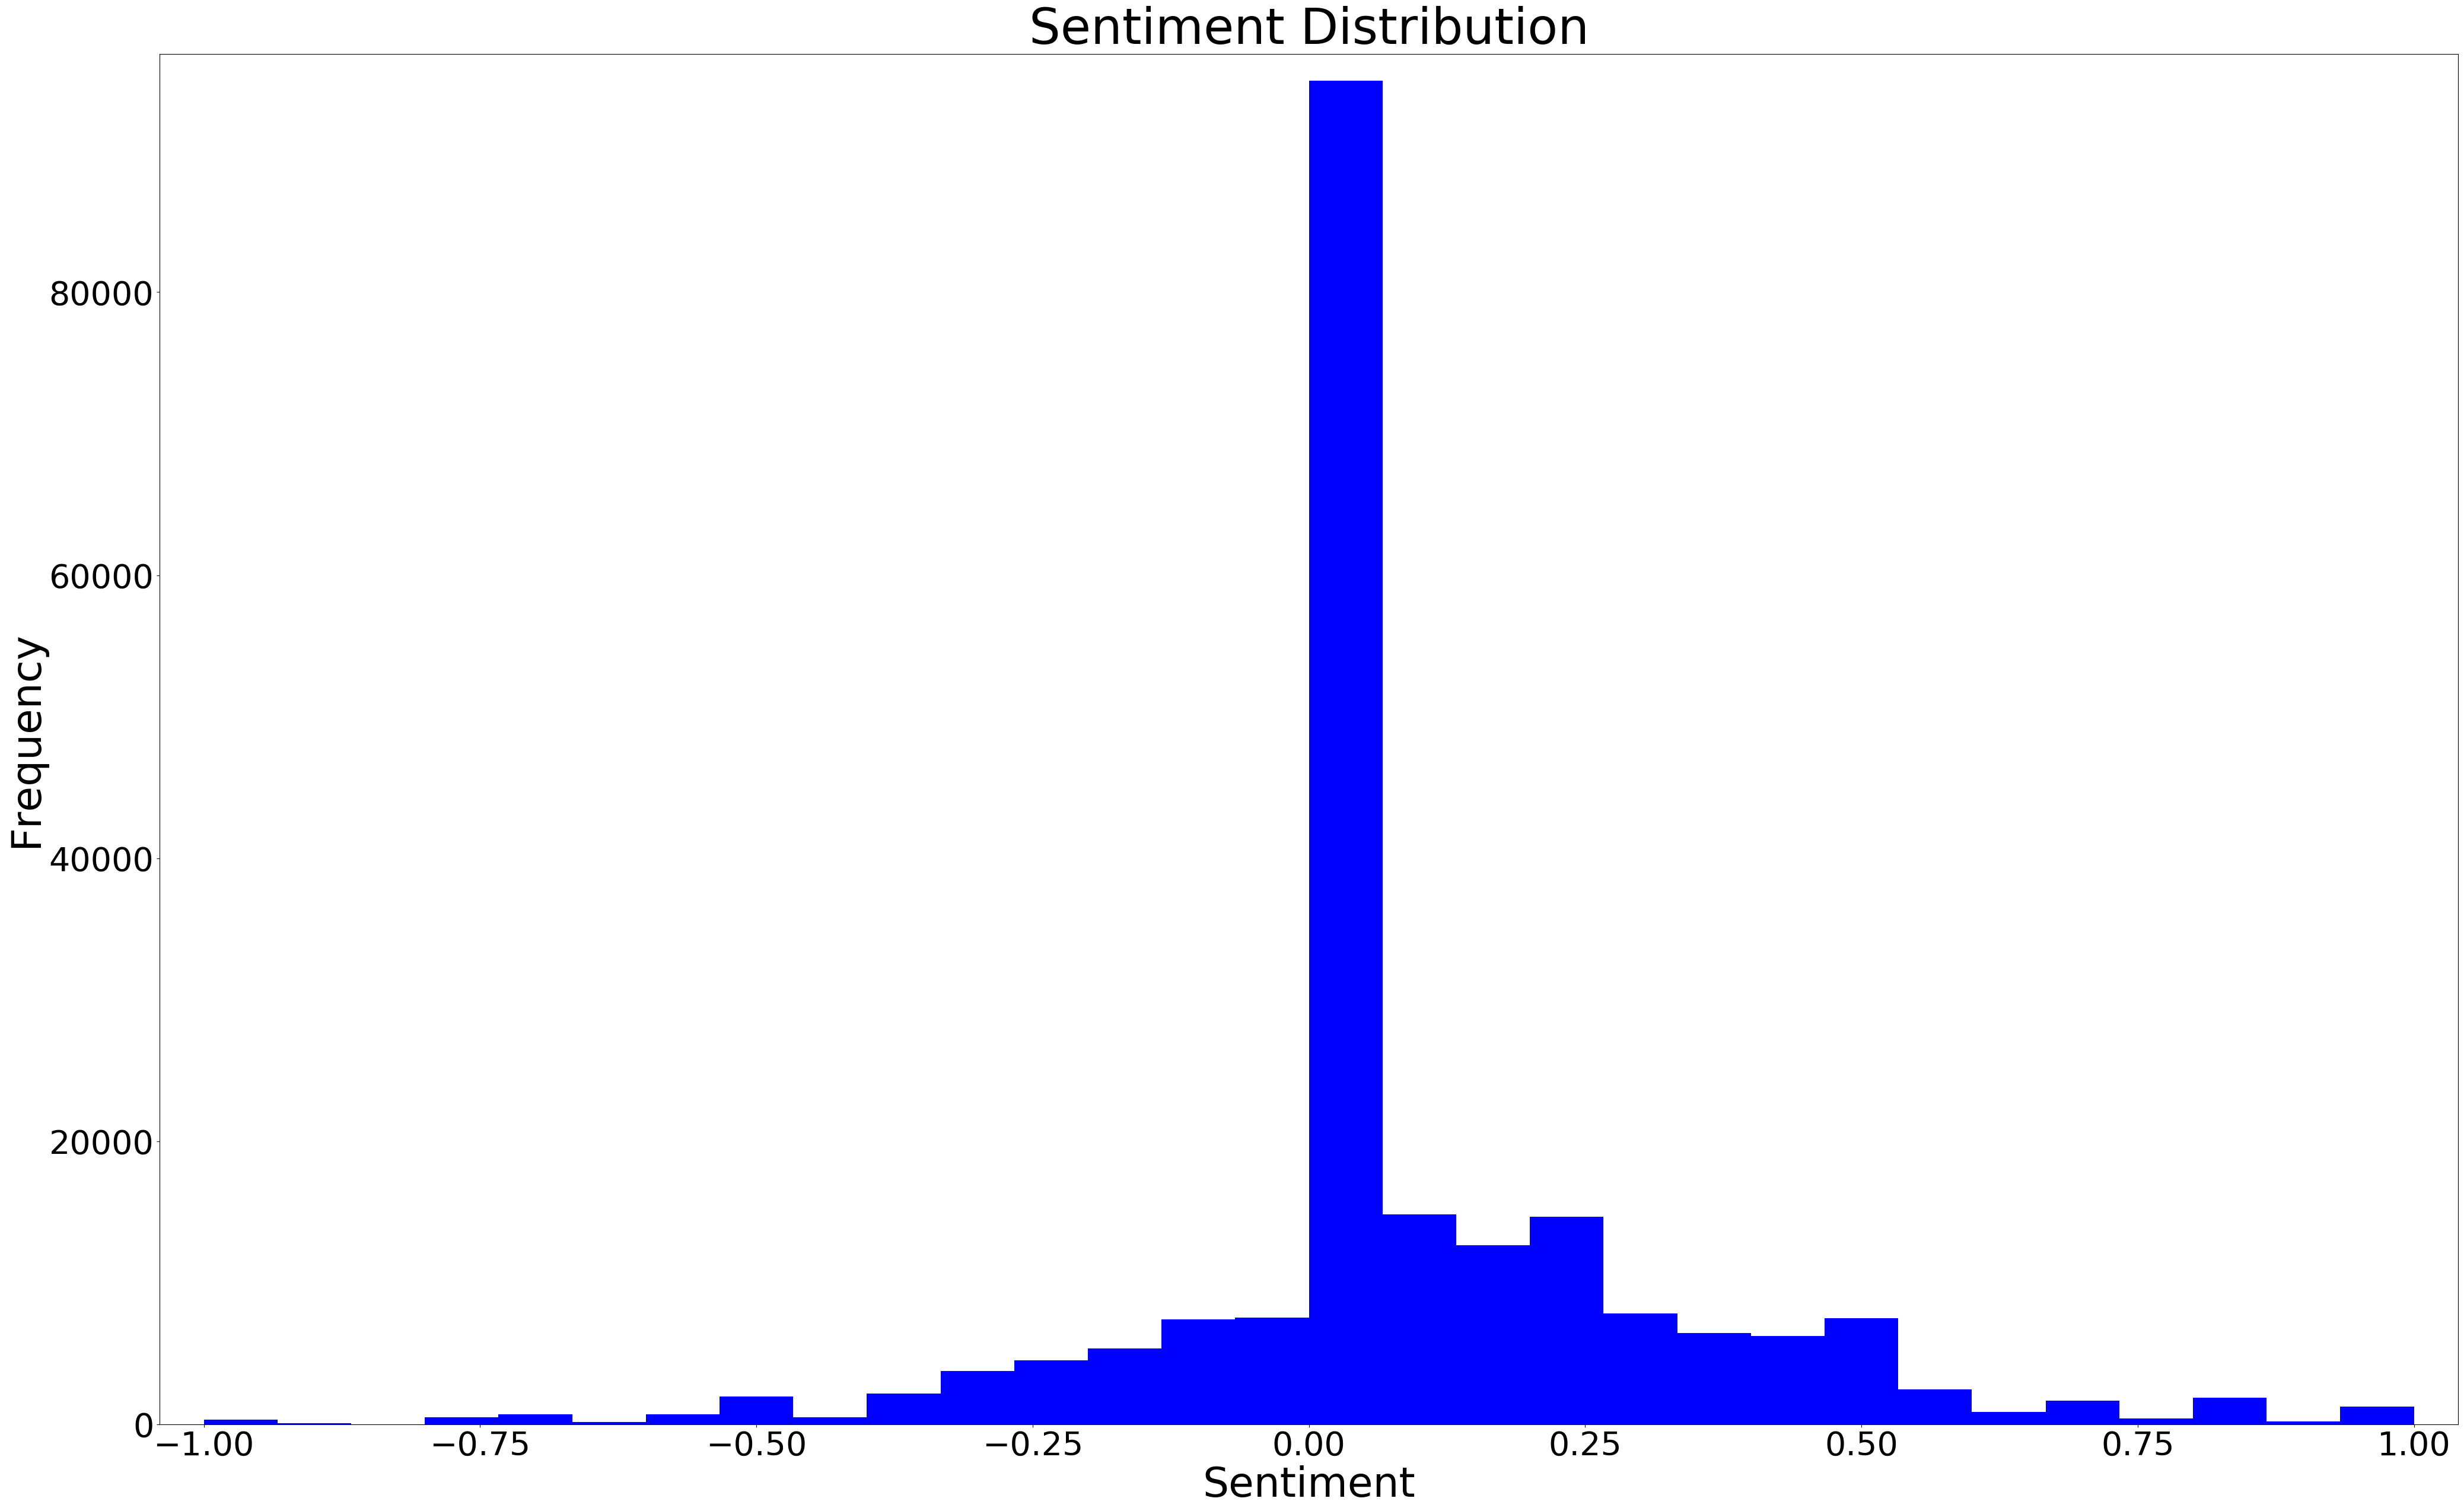

In [32]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment_desc'], bins=30, color = 'blue')
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

C:\Users\cep4u\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\cep4u\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:533: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

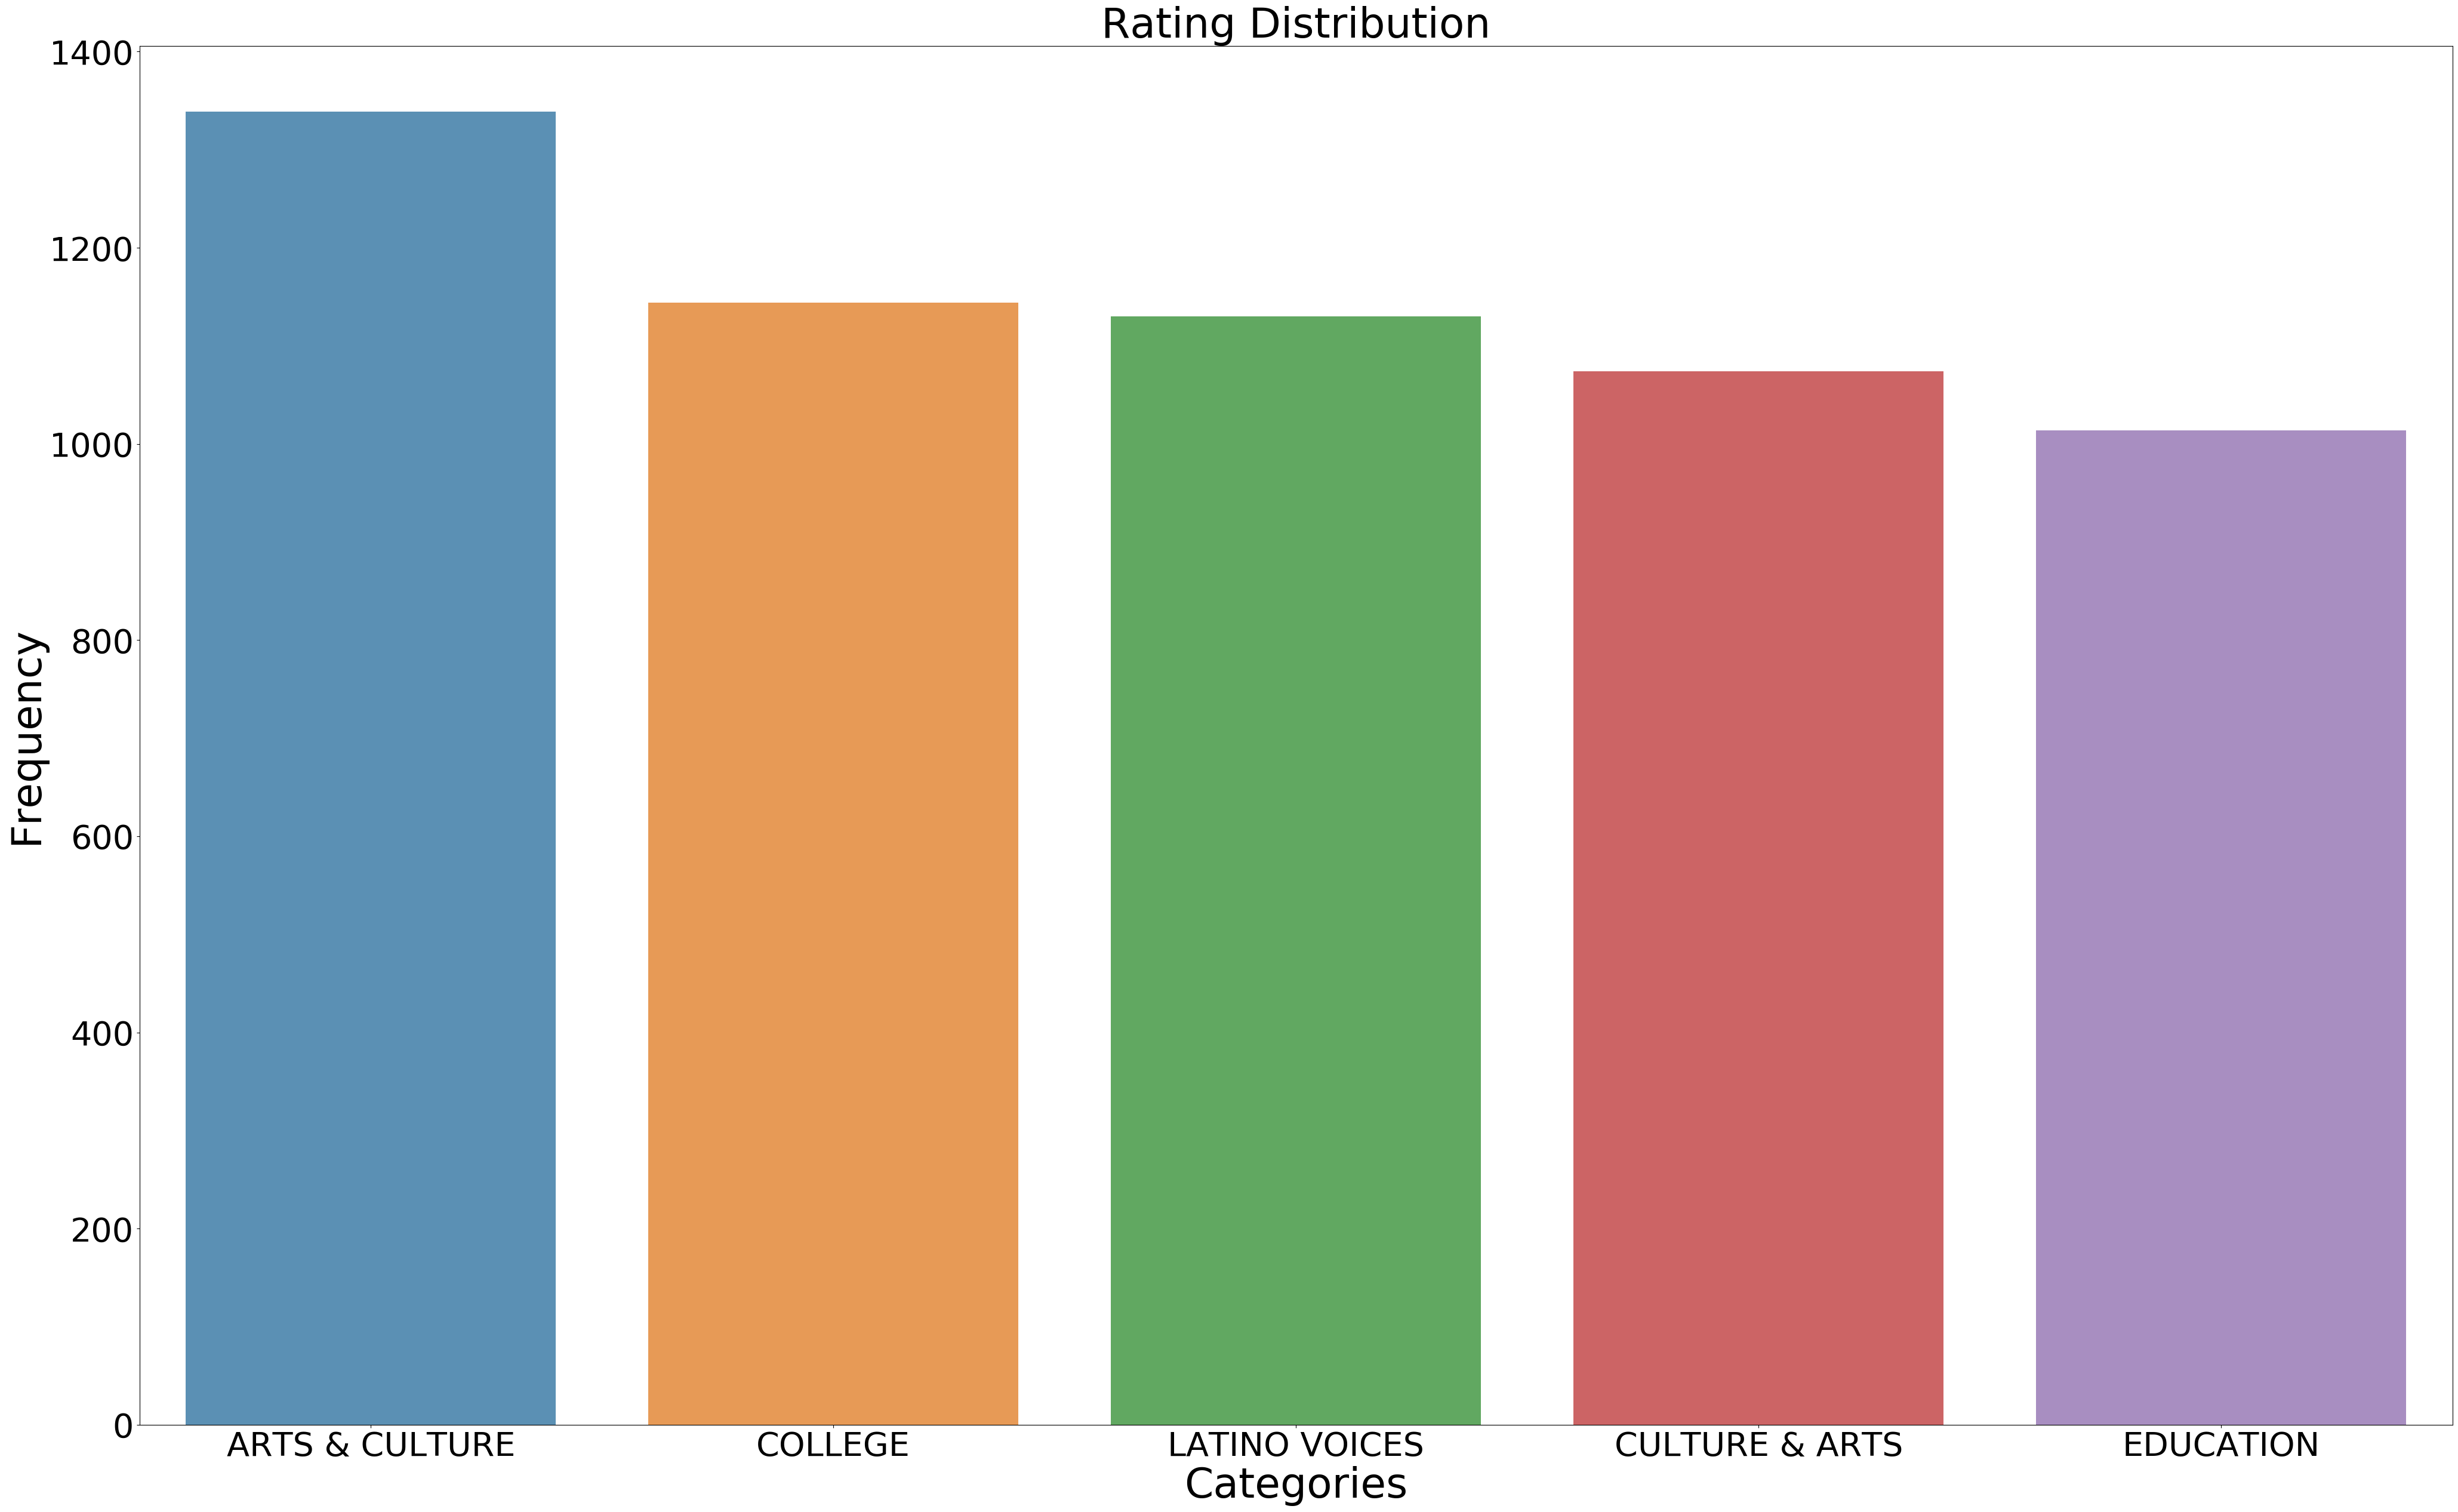

In [41]:
x_cat = df.category.value_counts().tail()
y_cat = x_cat.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_cat.index, x_cat.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Categories', fontsize=50)
plt.xticks(fontsize=40)

In [34]:
words = df['lemmatized_hdl']
allwords = []
for wordlist in words:
    allwords += wordlist

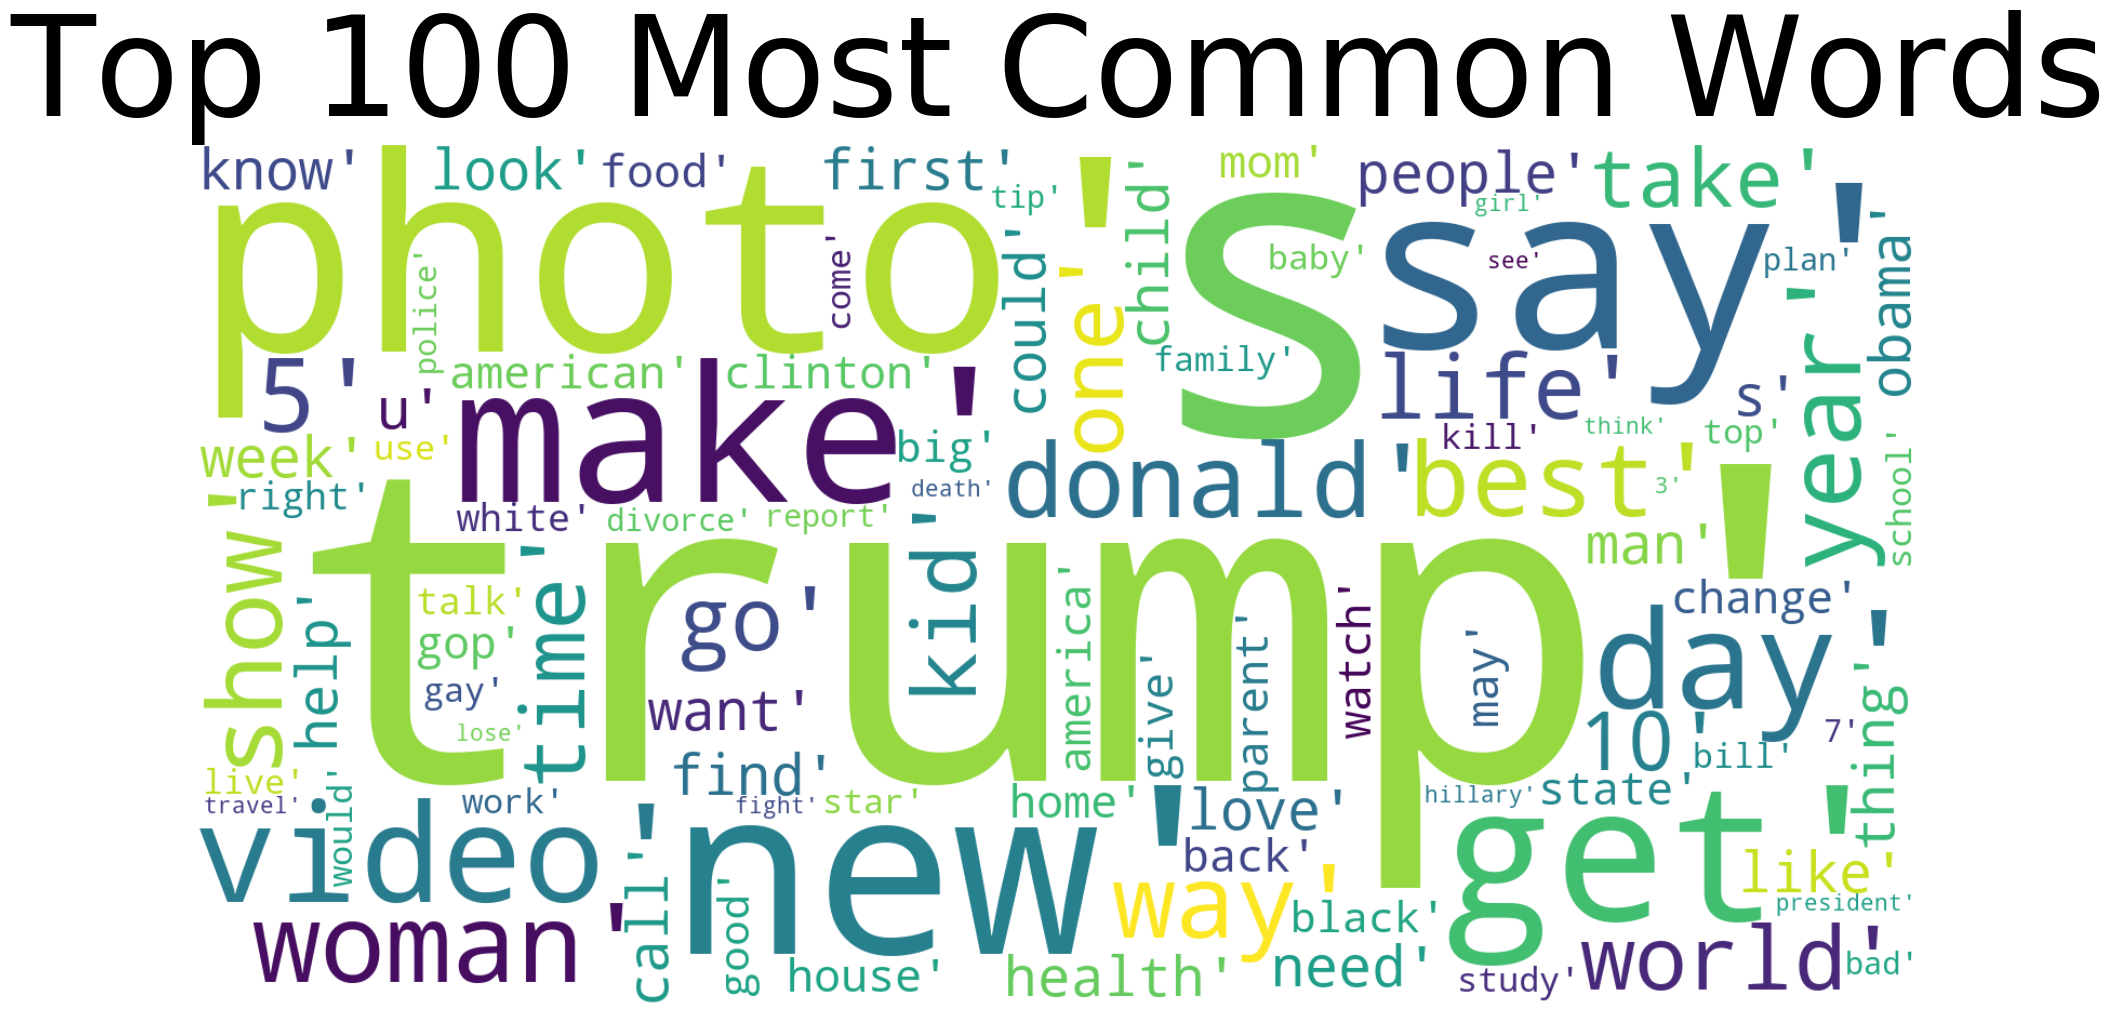

In [35]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [36]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str_hdl'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

C:\Users\cep4u\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,100,101,11,12,13,14,15,150,...,zealand,zen,zero,zika,zimmerman,zoe,zombie,zone,zoo,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_tech = df[df['category'] == 'TECH']

In [50]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [47]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf_tech = tf_vectorizer.fit_transform(df_tech['lemma_str_hdl'].values.astype('U'))
tf_feature_names_tech = tf_vectorizer.get_feature_names()
doc_term_matrix_tech = pd.DataFrame(tf_tech.toarray(), columns=list(tf_feature_names_tech))
doc_term_matrix_tech

C:\Users\cep4u\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amazon,app,apple,best,big,billion,car,change,company,could,...,want,watch,way,week,woman,work,world,year,you,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2102,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [49]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf_tech)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(lda_model, tf_feature_names_tech, no_top_words)

Topic 0:
amazon microsoft world big day plan launch life save deal
Topic 1:
new week want company time hack deal best digital cyber
Topic 2:
iphone video watch internet woman uber thing fbi week youtube
Topic 3:
youtube get say million apple pay still samsung want week
Topic 4:
twitter top go social fight way medium week youtube watch
Topic 5:
google online use privacy hacker may future work cyber data
Topic 6:
facebook data app know news user like people privacy report
Topic 7:
apple ipad rumor car one year game people report fbi
Topic 8:
tech take instagram billion change people user woman one want
Topic 9:
make could phone help you samsung get fbi people use


In [54]:
df_tech = df[df['category'] == 'ARTS & CULTURE']
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf_tech = tf_vectorizer.fit_transform(df_tech['lemma_str_hdl'].values.astype('U'))
tf_feature_names_tech = tf_vectorizer.get_feature_names()
doc_term_matrix_tech = pd.DataFrame(tf_tech.toarray(), columns=list(tf_feature_names_tech))
doc_term_matrix_tech
lda_model = LatentDirichletAllocation(n_components=6, learning_method='online', max_iter=500, random_state=0).fit(tf_tech)
no_top_words = 5
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(lda_model, tf_feature_names_tech, no_top_words)

C:\Users\cep4u\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0:
new photo life show want story hamilton people america the
Topic 1:
book make history one read america people story new want
Topic 2:
art woman get say broadway the show feminist history hamilton
Topic 3:
trump year world donald america show want say art get
Topic 4:
artist feminist museum meet america show one history woman say


In [63]:
df_tech = df[df['category'] == 'GREEN']
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf_tech = tf_vectorizer.fit_transform(df_tech['lemma_str_hdl'].values.astype('U'))
tf_feature_names_tech = tf_vectorizer.get_feature_names()
doc_term_matrix_tech = pd.DataFrame(tf_tech.toarray(), columns=list(tf_feature_names_tech))
doc_term_matrix_tech
lda_model = LatentDirichletAllocation(n_components=5, learning_method='online', max_iter=500, random_state=0).fit(tf_tech)
no_top_words = 5
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(lda_model, tf_feature_names_tech, no_top_words)

C:\Users\cep4u\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0:
climate change water find global
Topic 1:
dog save world watch hurricane
Topic 2:
california make wildfire green one
Topic 3:
new year you get animal
Topic 4:
trump oil could kill photo


In [64]:
df_tech = df[df['category'] == 'GREEN']
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf_tech = tf_vectorizer.fit_transform(df_tech['lemma_str_desc'].values.astype('U'))
tf_feature_names_tech = tf_vectorizer.get_feature_names()
doc_term_matrix_tech = pd.DataFrame(tf_tech.toarray(), columns=list(tf_feature_names_tech))
doc_term_matrix_tech
lda_model = LatentDirichletAllocation(n_components=5, learning_method='online', max_iter=500, random_state=0).fit(tf_tech)
no_top_words = 5
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(lda_model, tf_feature_names_tech, no_top_words)

C:\Users\cep4u\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0:
water life know first one
Topic 1:
world energy dog environmental human
Topic 2:
people animal could say good
Topic 3:
climate change need global go
Topic 4:
state time like year you
